In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,accuracy_score
import seaborn as sns
from sklearn import metrics
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix,recall_score,precision_score,fbeta_score

In [6]:
data=pd.read_csv("water_quality_dataset.csv")
data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [7]:
data.shape

(7999, 21)

# Data Analysis


In [8]:
data.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [10]:
dataset=data.copy()

#### observed #NUM! in the dataset replacing it the NAN value

In [11]:
dataset.iloc[7551]

aluminium       0.03
ammonia        #NUM!
arsenic         0.08
barium          0.79
cadmium         0.07
chloramine      0.08
chromium        0.05
copper          0.58
flouride        0.34
bacteria           0
viruses            0
lead           0.183
nitrates        4.37
nitrites        1.43
mercury        0.007
perchlorate     0.62
radium          2.54
selenium        0.07
silver          0.05
uranium         0.05
is_safe        #NUM!
Name: 7551, dtype: object

In [12]:
dataset.replace('#NUM!', np.nan, inplace=True)
dataset.isnull().sum()

aluminium      0
ammonia        3
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        3
dtype: int64

In [13]:
dataset=dataset.dropna()

In [14]:
dataset.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [15]:
dataset[["is_safe", "ammonia"]] = dataset[["is_safe", "ammonia"]].apply(pd.to_numeric)


#### changed data type of is_safe, ammonia columns

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

<AxesSubplot:xlabel='is_safe', ylabel='count'>

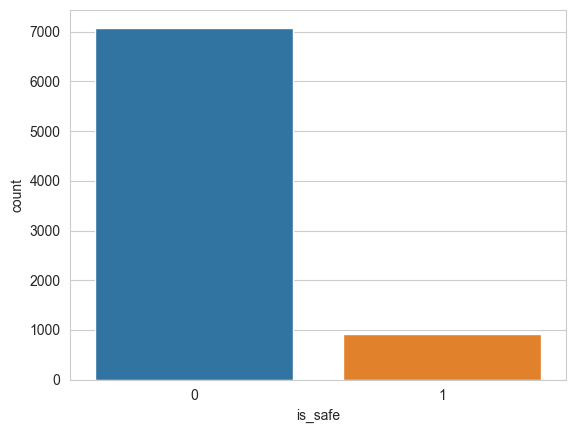

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='is_safe',data=dataset)

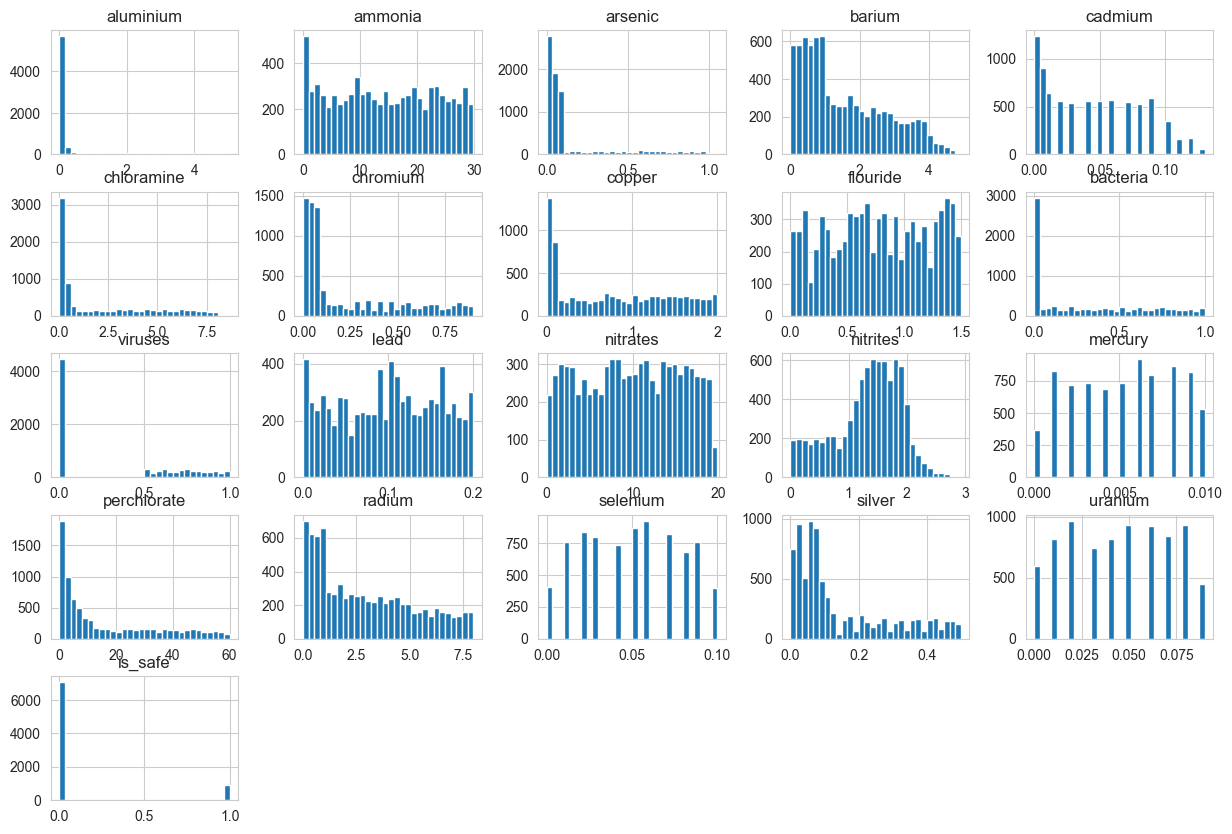

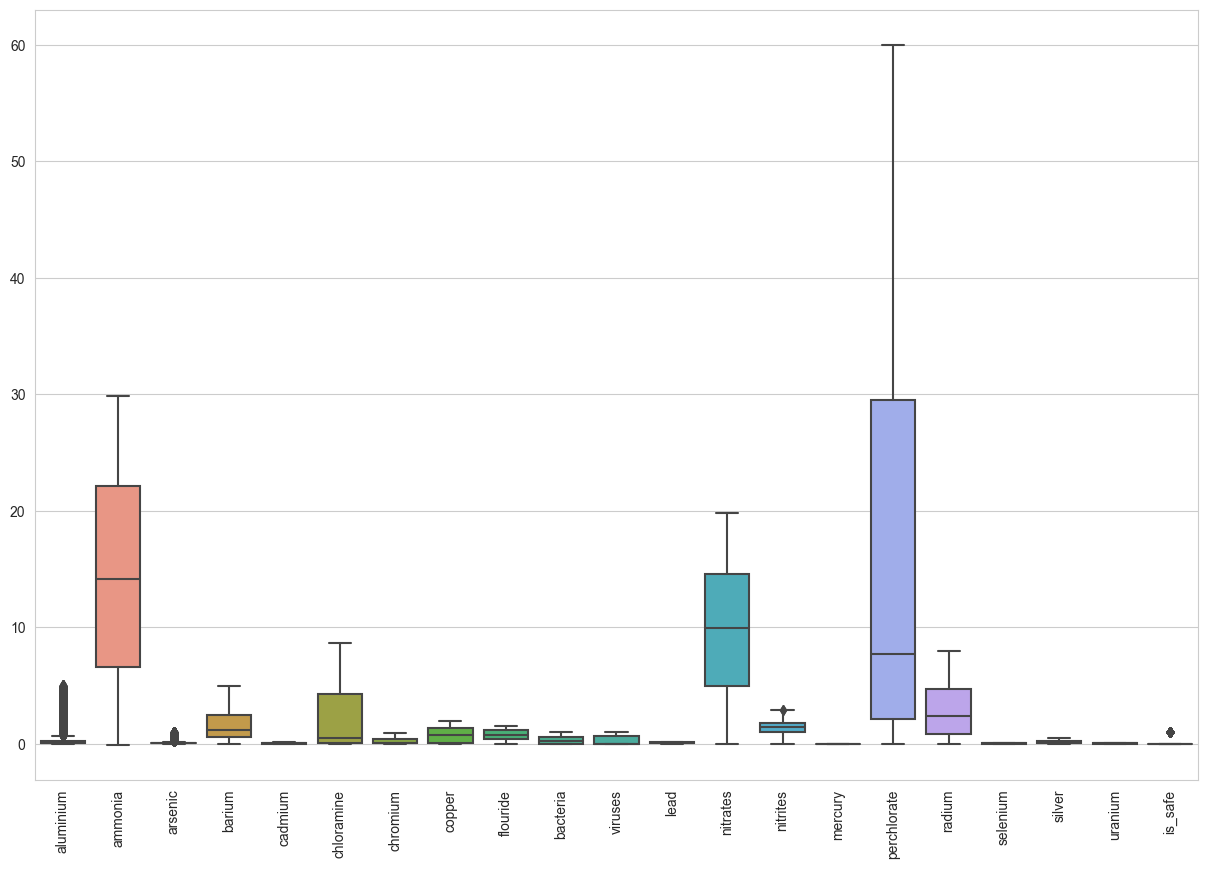

In [18]:
dataset.hist(bins=30, figsize=(15, 10))
plt.show()

# Box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=dataset)
plt.xticks(rotation=90)
plt.show() 

#### Oberving the relationship between the target feature and the independent features using boxplot

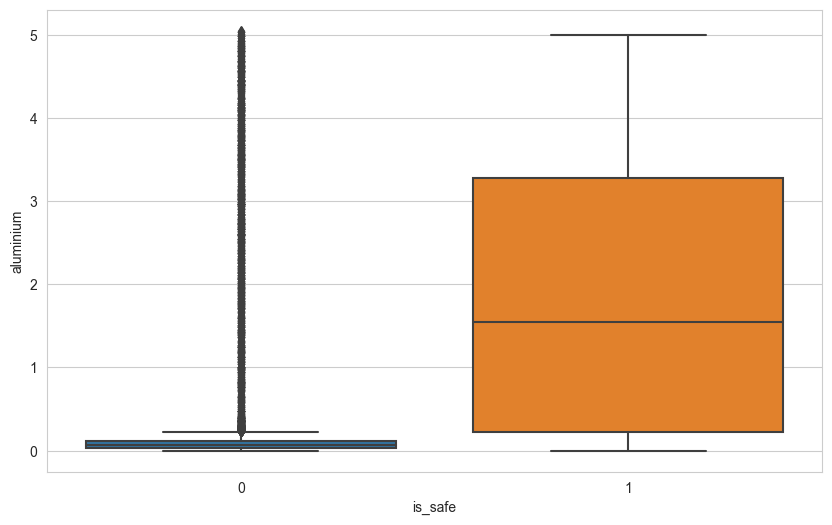

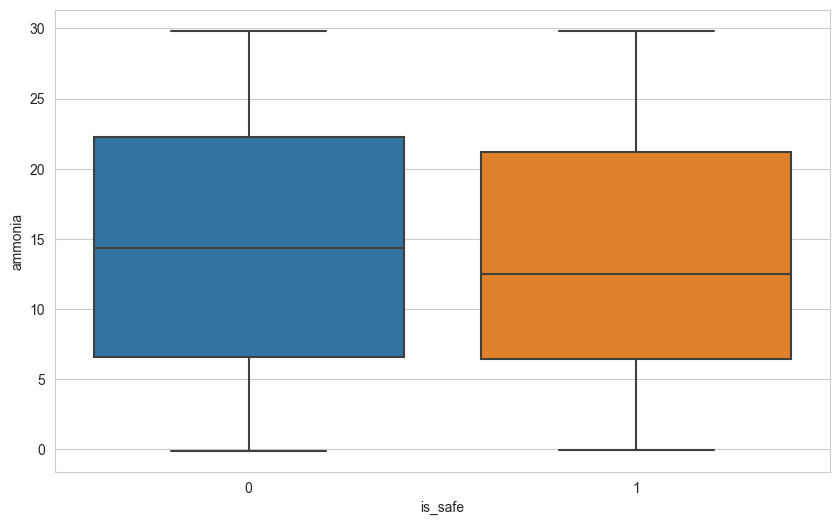

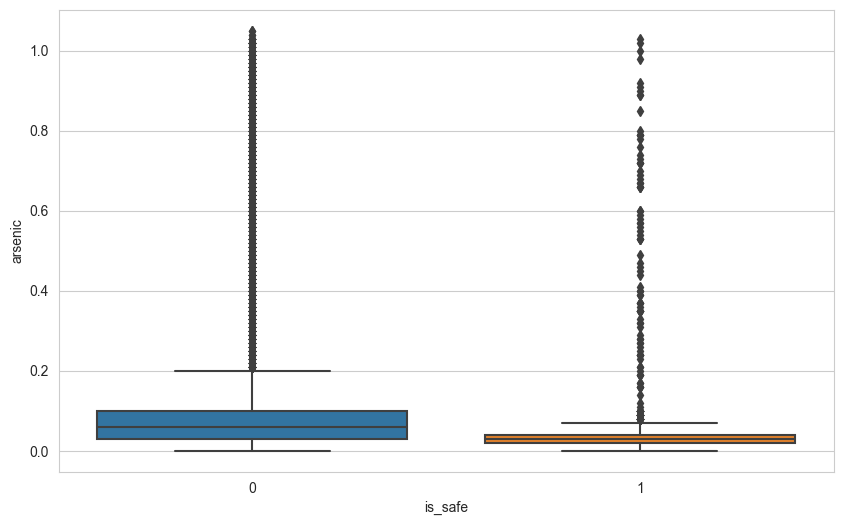

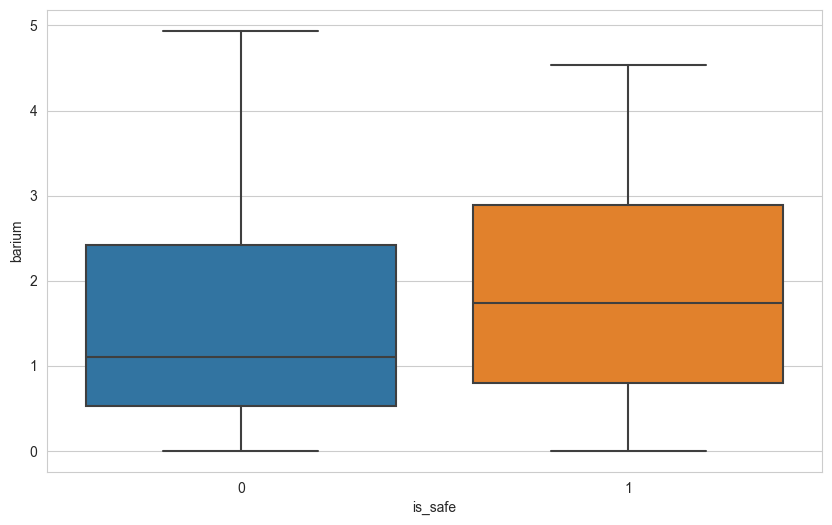

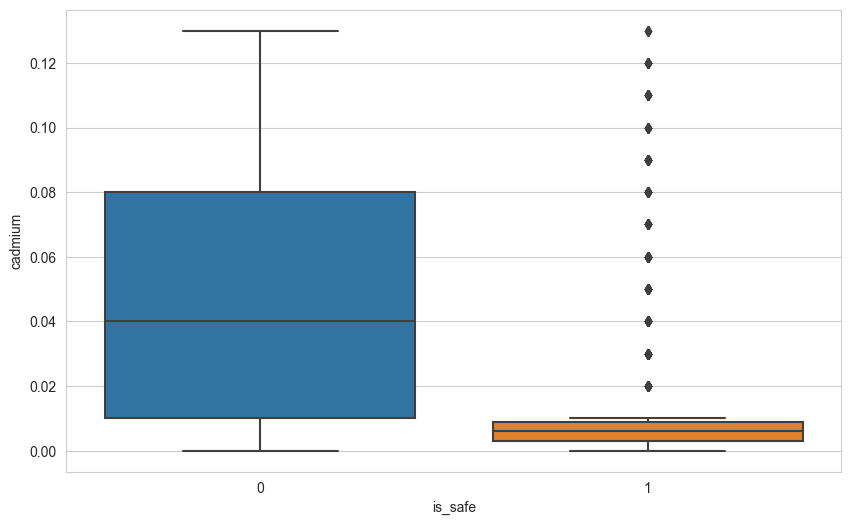

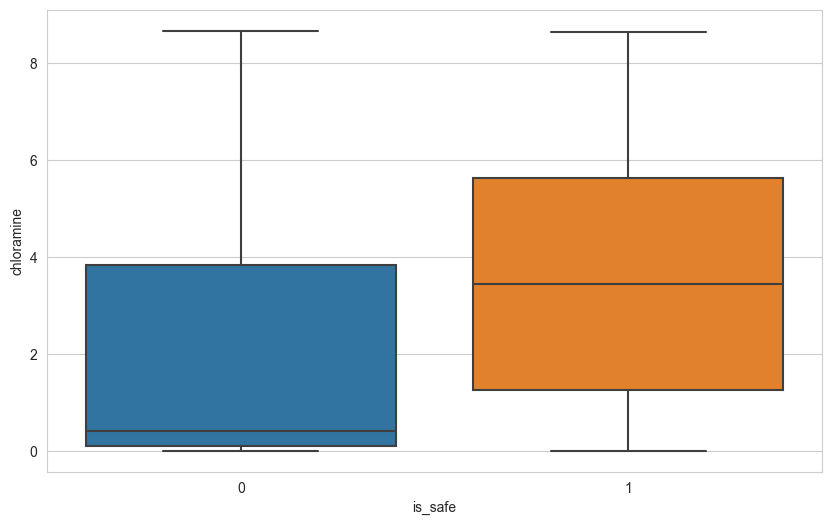

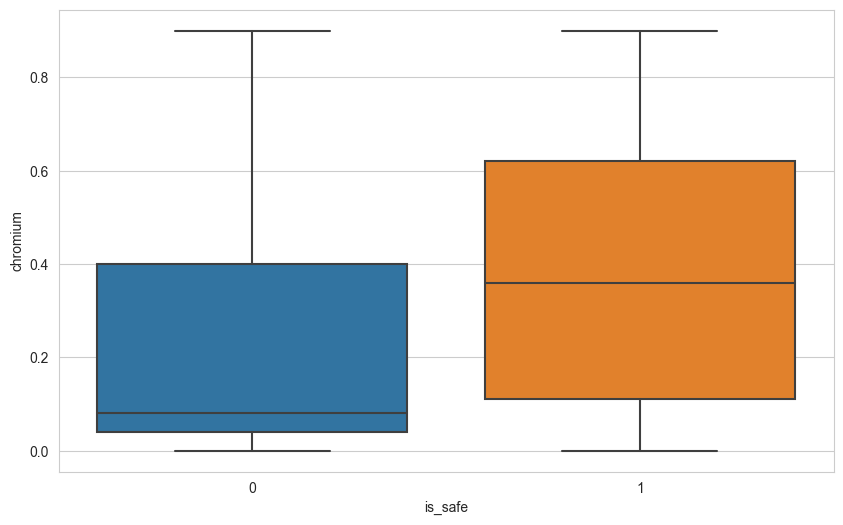

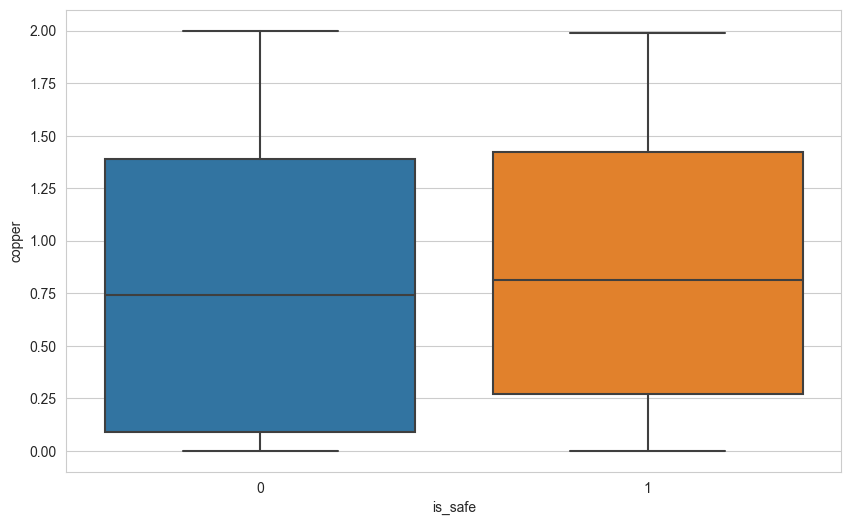

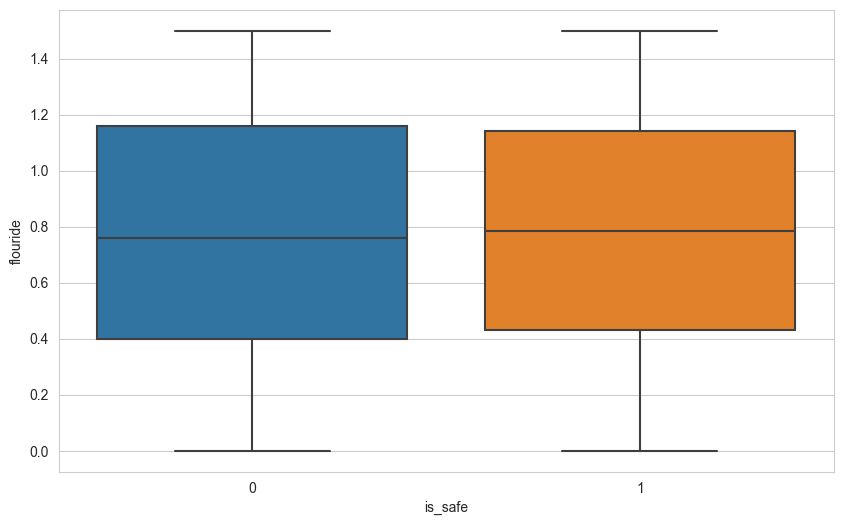

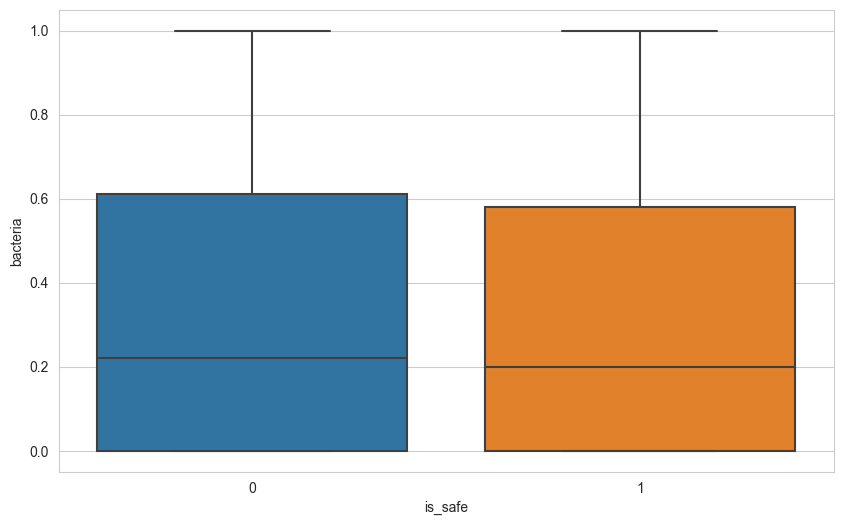

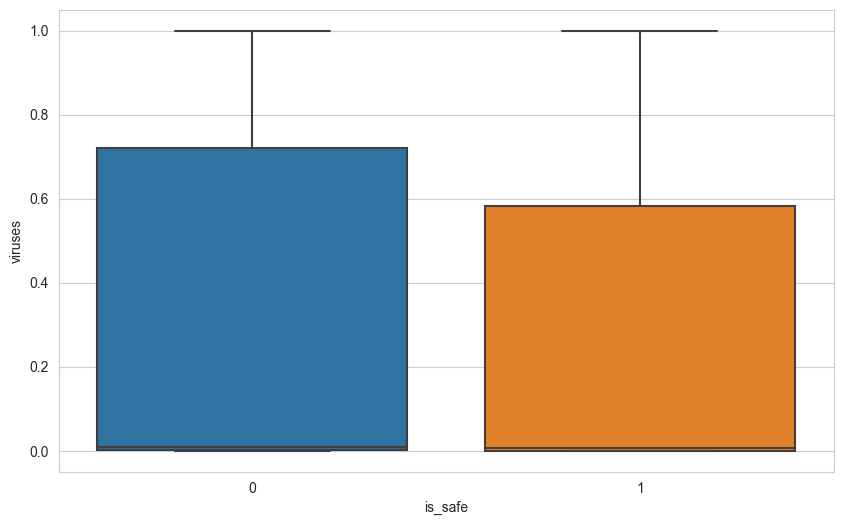

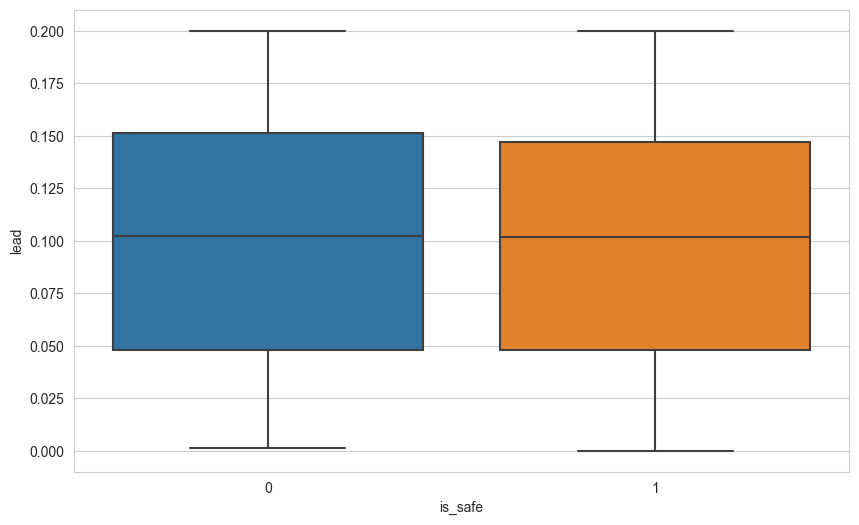

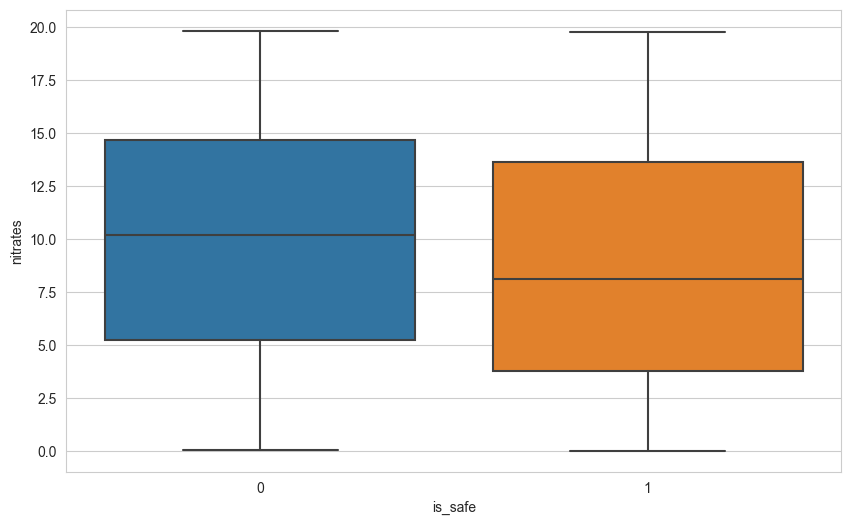

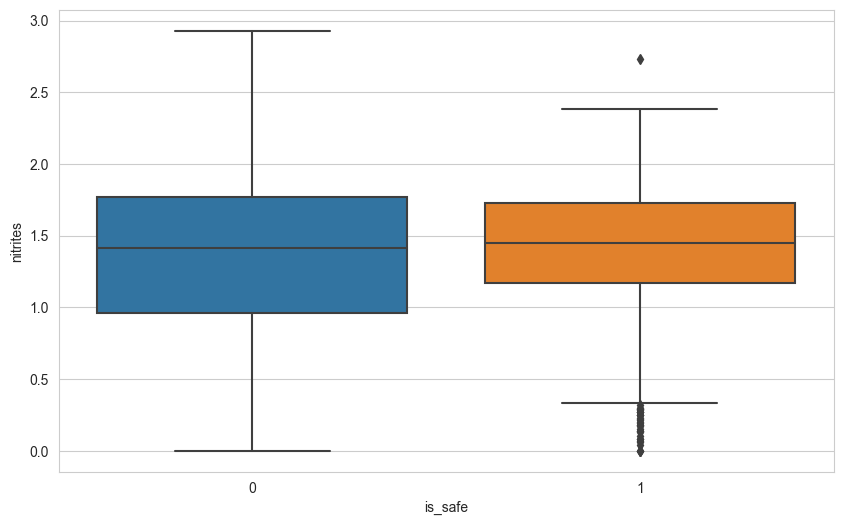

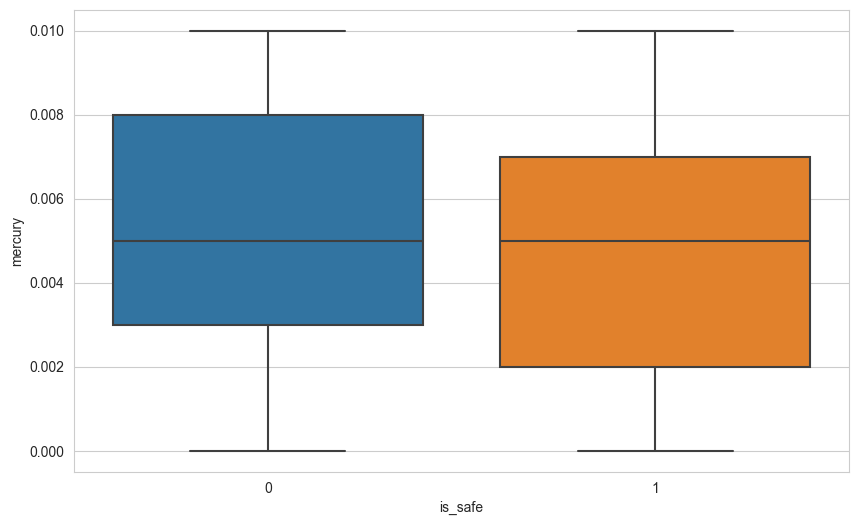

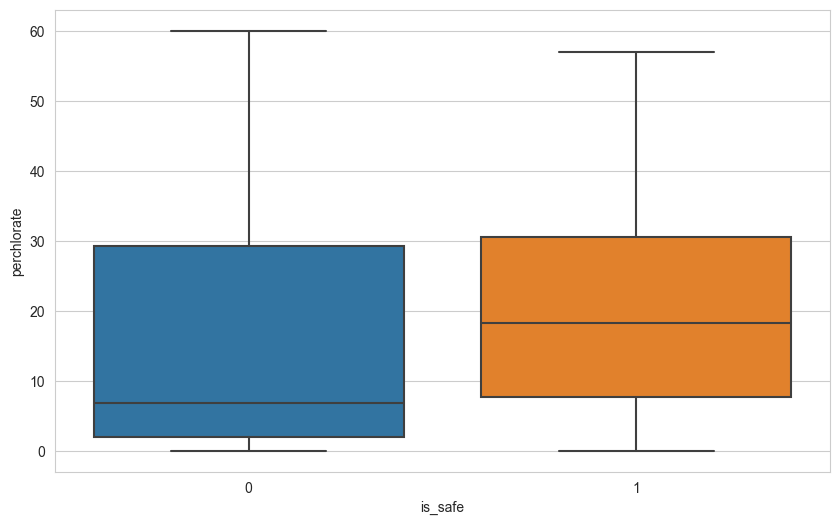

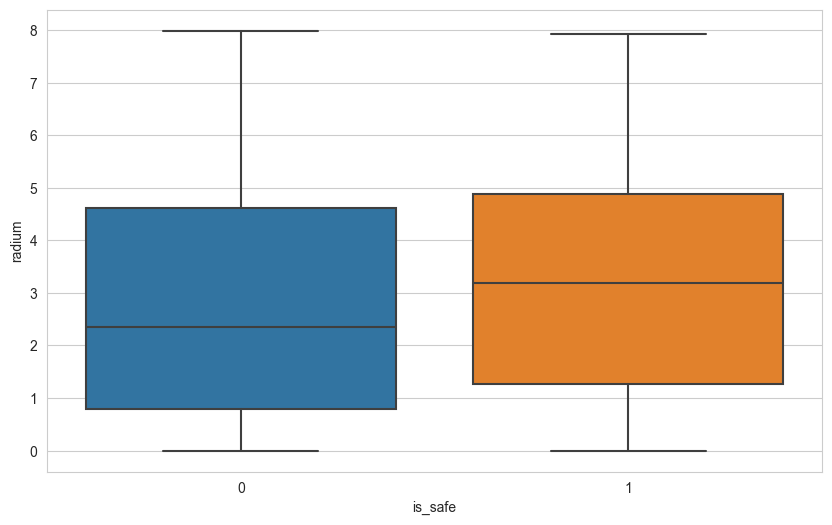

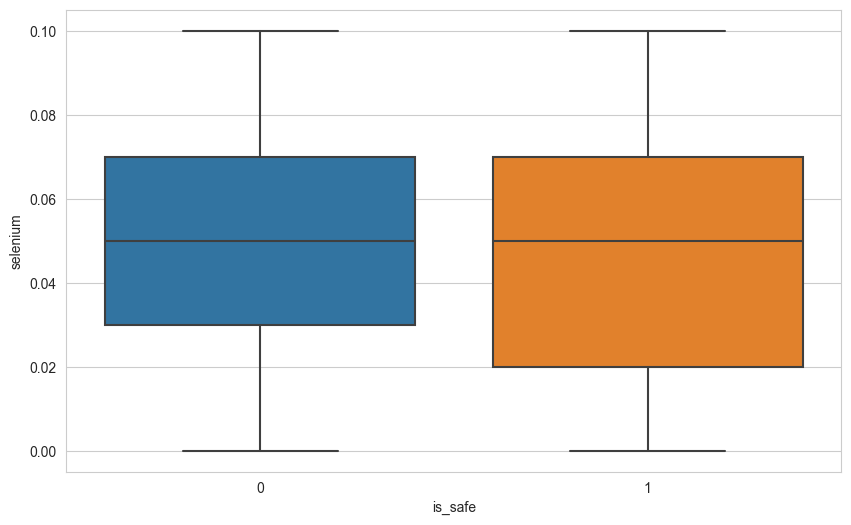

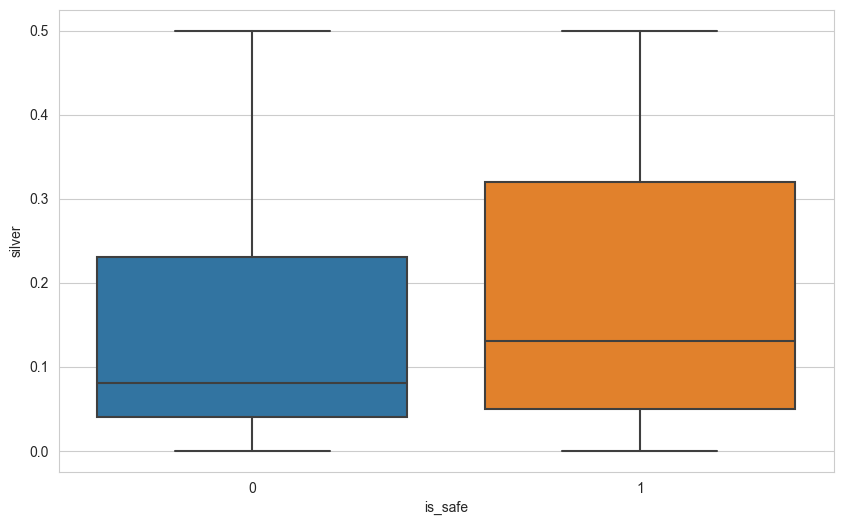

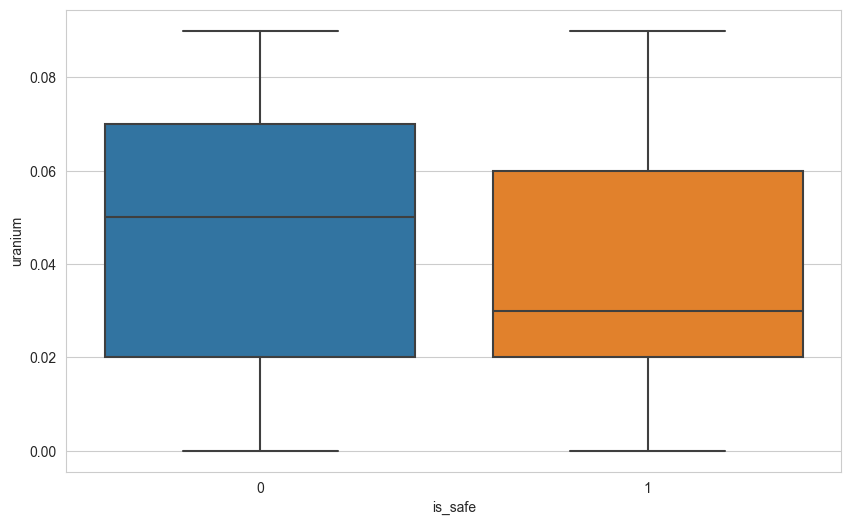

In [19]:
for column in dataset.columns:
    if column != 'is_safe':
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='is_safe', y=column, data=dataset)
        plt.show()

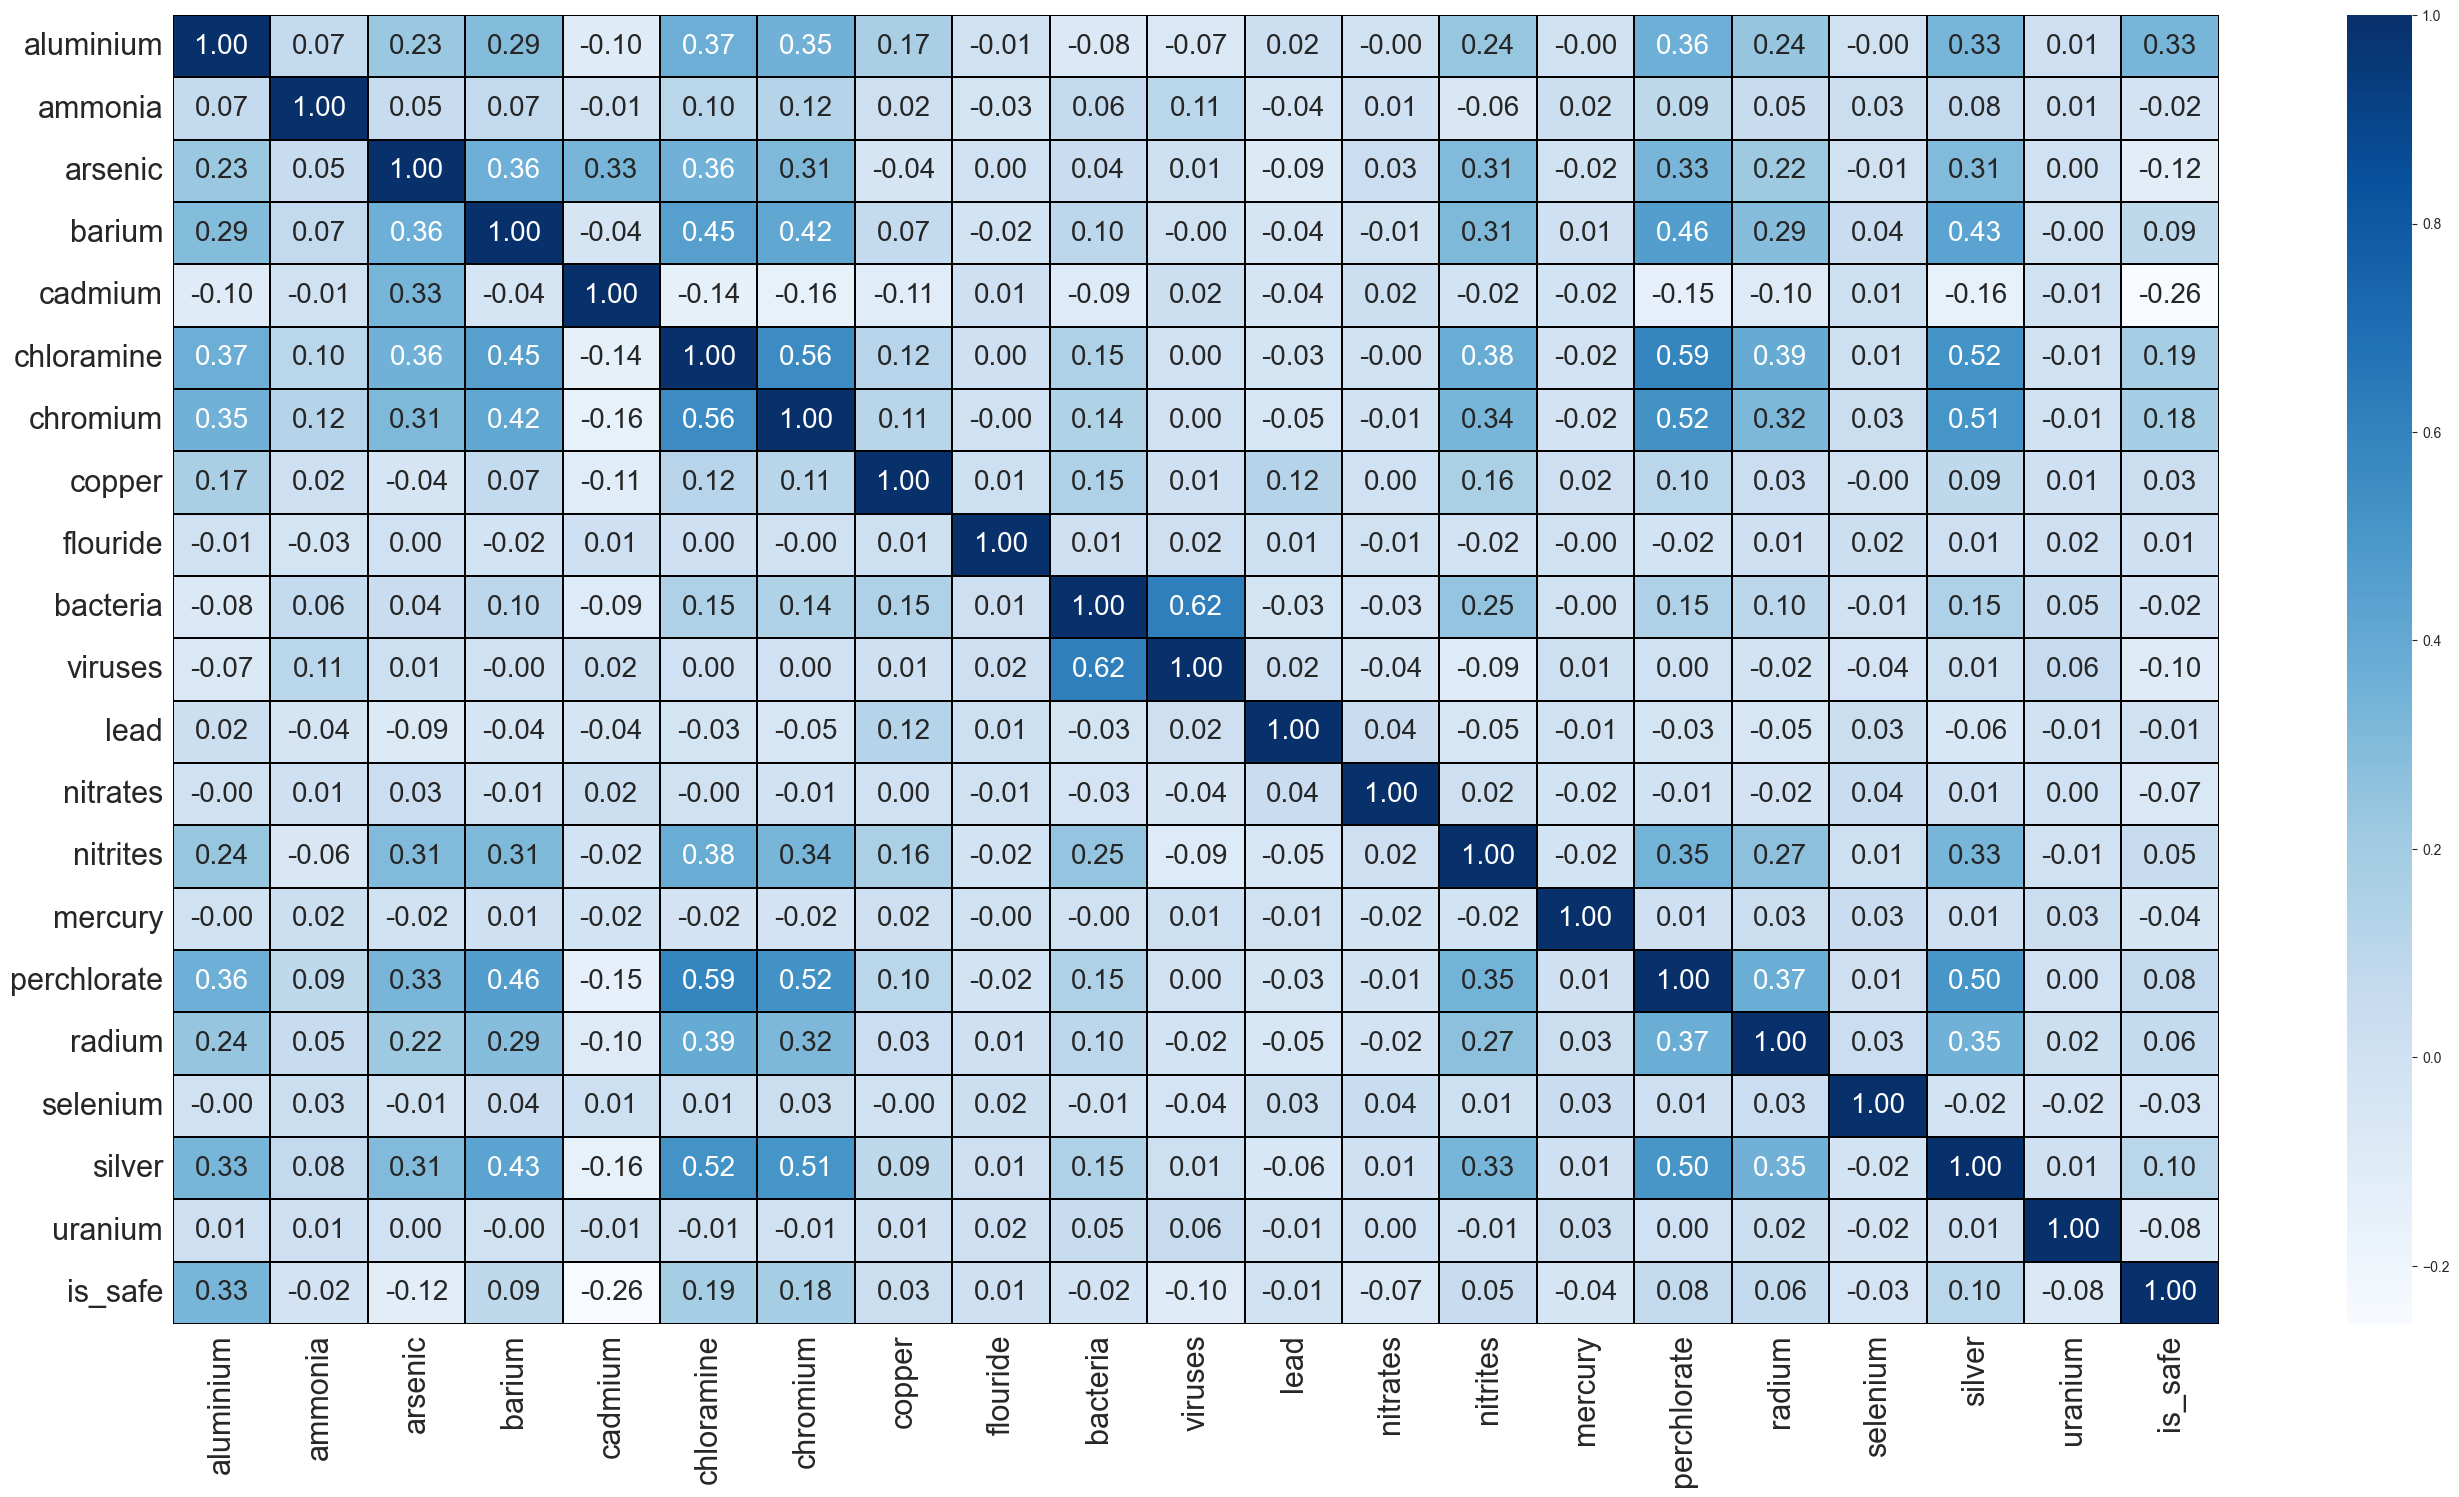

In [20]:
plt.figure(figsize = (33,17))
corr = dataset.corr()
sns.heatmap(corr, annot = True, cmap = 'Blues', linewidths = 0.01, linecolor = 'black',
            fmt = '0.2f', annot_kws = {'fontsize' : 20})
plt.yticks(fontsize = 22, rotation = 0)
plt.xticks(fontsize = 22, rotation = 90)
plt.show()

In [21]:
features=[feature for feature in dataset.columns if feature not in ['is_safe']]
scaler=StandardScaler()
scaler.fit(dataset[features])

StandardScaler()

In [22]:
scaler.transform(dataset[features])

array([[ 0.77740287, -0.58549134, -0.48087476, ...,  1.05369443,
         1.33873624, -0.91704015],
       [ 1.30694501,  0.77511802, -0.59963176, ...,  1.05369443,
         0.85113427,  0.19802266],
       [ 0.27157158, -0.02908321, -0.48087476, ...,  0.70612871,
         2.03531047, -1.28872776],
       ...,
       [-0.45556091, -0.83666343, -0.63921743, ..., -1.72683135,
        -0.75098648,  0.19802266],
       [-0.51878982, -0.48186877, -0.59963176, ..., -1.72683135,
        -1.02961617, -1.66041536],
       [-0.49507898, -0.83666343, -0.59963176, ..., -1.72683135,
        -0.75098648,  0.19802266]])

In [23]:
dataset1 = pd.concat([dataset[['is_safe']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[features]), columns=features)],
                    axis=1)

In [24]:
dataset1.head()

,is_safe,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,...,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,1,0.777403,-0.585491,-0.480875,1.054205,-0.993241,-0.711941,2.152993,-0.973050,-1.657446,...,-0.869387,-0.781070,1.129767,-0.348629,0.609178,1.203362,1.661842,1.053694,1.338736,-0.917040
1,1,1.306945,0.775118,-0.599632,1.432447,-1.131948,1.208552,1.598765,-0.223303,0.294799,...,0.849782,0.009785,-1.409197,1.046960,-0.739005,0.892977,0.124811,1.053694,0.851134,0.198023
2,0,0.271572,-0.029083,-0.480875,-0.812340,-0.965499,0.803417,1.044536,-1.202564,0.501507,...,-0.861452,-0.368450,0.783298,-0.383518,0.272132,1.911763,1.786699,0.706129,2.035310,-1.288728
3,1,0.548198,-0.332067,-0.480875,1.144654,-1.159690,1.968179,-0.802892,1.306793,0.708215,...,1.008475,-1.434385,-1.517469,-0.069511,-0.401960,-0.415275,-0.516695,-1.031700,2.104968,0.198023
4,1,0.200439,1.132165,-0.520460,-1.124801,-1.020982,0.191820,1.635713,-0.361012,-0.371261,...,-0.866742,0.302058,-0.555658,-0.383518,-0.739005,0.024578,-0.219622,-1.031700,-0.611672,-0.917040


In [25]:
x=dataset1.drop(['is_safe'],axis=1).copy()
y=dataset1[['is_safe']].copy()

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [27]:
x_train.shape,y_train.shape

((5997, 20), (5997, 1))

In [28]:
x_test.shape,y_test.shape

((1999, 20), (1999, 1))

In [29]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
feature_sel_model = SelectFromModel(Lasso(alpha=0.008, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.008, random_state=0))

In [30]:
feature_sel_model.get_support()

array([ True,  True,  True, False,  True,  True,  True,  True, False,
       False,  True, False,  True, False, False,  True, False,  True,
       False,  True])

In [31]:
selected_feat = x_train.columns[(feature_sel_model.get_support())]
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 20
selected features: 12


In [32]:
selected_feat

Index(['aluminium', 'ammonia', 'arsenic', 'cadmium', 'chloramine', 'chromium',
       'copper', 'viruses', 'nitrates', 'perchlorate', 'selenium', 'uranium'],
      dtype='object')

In [33]:
x_train=x_train[selected_feat]
x_test=x_test[selected_feat]

In [34]:
model = RandomForestClassifier(max_depth=20,min_samples_split=8, random_state=0) # Add parameters to the model!
model.fit(x_train.values, y_train.values) 

d:\water_quality_prediction\Water_Quality_Prediction\venv\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(max_depth=20, min_samples_split=8, random_state=0)

In [35]:
y_pred=model.predict(x_test.values)

In [36]:
accuracy=accuracy_score(y_test.values,y_pred)
accuracy

0.951975987993997

In [37]:
confusion_matrix(y_test.values,y_pred)

array([[1762,   11],
       [  85,  141]], dtype=int64)

In [38]:
probabilities = model.predict_proba(x_test.values)
percentages = probabilities * 100
percentages

array([[ 92.18293651,   7.81706349],
       [100.        ,   0.        ],
       [ 99.48888889,   0.51111111],
       ...,
       [ 75.59230214,  24.40769786],
       [100.        ,   0.        ],
       [ 98.83333333,   1.16666667]])

In [39]:
sample_data=data[selected_feat]
sample_data.head()

,aluminium,ammonia,arsenic,cadmium,chloramine,chromium,copper,viruses,nitrates,perchlorate,selenium,uranium
0,1.65,9.08,0.04,0.007,0.35,0.83,0.17,0.000,16.08,37.75,0.08,0.02
1,2.32,21.16,0.01,0.002,5.28,0.68,0.66,0.650,2.01,32.26,0.08,0.05
2,1.01,14.02,0.04,0.008,4.24,0.53,0.02,0.003,14.16,50.28,0.07,0.01
3,1.36,11.33,0.04,0.001,7.23,0.03,1.66,0.710,1.41,9.12,0.02,0.05
4,0.92,24.33,0.03,0.006,2.67,0.69,0.57,0.001,6.74,16.90,0.02,0.02


In [40]:
sample=dataset[selected_feat].iloc[0]
print(sample)
print(sample.shape)

aluminium       1.650
ammonia         9.080
arsenic         0.040
cadmium         0.007
chloramine      0.350
chromium        0.830
copper          0.170
viruses         0.000
nitrates       16.080
perchlorate    37.750
selenium        0.080
uranium         0.020
Name: 0, dtype: float64
(12,)


In [41]:
scaler1=StandardScaler()
scaler1.fit(dataset[selected_feat].values)

StandardScaler()

In [42]:
model.predict_proba(scaler1.transform(sample.values.reshape(1,-1)))

array([[0.27385238, 0.72614762]])

In [43]:
sample2=dataset[selected_feat].iloc[4]

In [44]:
import pickle

In [50]:
pickle.dump(scaler1,open('scaling.pkl','wb'))

In [45]:
pickle.dump(model,open('water_quality_model.pkl','wb'))

In [46]:
pickle_model=pickle.load(open('water_quality_model.pkl','rb'))

In [47]:
pickle_model.predict_proba(scaler1.transform(sample2.values.reshape(1,-1)))

array([[0.03417929, 0.96582071]])

In [48]:
dataset.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [49]:
print("Train accuracy =", model.score(x_train.values, y_train.values))
print("Train accuracy =", model.score(x_test.values, y_test.values))

Train accuracy = 0.9778222444555611
Train accuracy = 0.951975987993997
